# Overall Activity Score Creation
# --------------------------------------
# Description:
# This notebook focuses on creating an Overall Activity Score based on a combination of
# four key inputs: Steps, Minutes, Calories Burned, and Total Distance. The purpose of this
# exercise is to establish a standardized score that reflects a user's overall activity
# level, and to allow users to input their data and receive a percentile comparison to
# other users' scores. This helps users understand where they stand relative to others
# in terms of daily activity.

# Author: Darren McCauley
# Date: April 2025

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel("ImprovedData.xlsx", engine='openpyxl')
print(df.head())

Saving ImprovedData.xlsx to ImprovedData (1).xlsx
    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD            8.02                  2.03   
1  7550634     Angel      NSW            5.82                  2.28   
2  5304572    Joshua      NSW            0.11                  0.00   
3  3234489   Jeffrey      NSW            7.21                  0.00   
4  8204212      Jill      QLD            7.86                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4                        0.73                   6.79   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                        0.0                   26                     10   
1                        0.0      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df['Minutes'] = df['Very_Active_Minutes'] + df['Fairly_Active_Minutes'] + df['Lightly_Active_Minutes']
df2 = df[['Name', 'Location', 'Total_Distance', 'Steps', 'Calories_Burned', 'Minutes']]



print(df2.head())

       Name Location  Total_Distance  Steps  Calories_Burned  Minutes
0  Danielle      QLD            8.02  10449             2536      385
1     Angel      NSW            5.82   8001             2902      181
2    Joshua      NSW            0.11    152             2100       12
3   Jeffrey      NSW            7.21   9543             2450      359
4      Jill      QLD            7.86  10218             3013      283


In [ ]:
# Copy to preserve original data
df2['OverallActivity'] = (
    0.001 * df2['Steps'] +
    0.5   * df2['Minutes'] +
    0.05  * df2['Calories_Burned'] +
    1.0   * df2['Total_Distance']
)
df2

<ipython-input-8-68b4e1858e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['OverallActivity'] = (


,Name,Location,Total_Distance,Steps,Calories_Burned,Minutes,OverallActivity
0,Danielle,QLD,8.02,10449,2536,385,337.769
1,Angel,NSW,5.82,8001,2902,181,249.421
2,Joshua,NSW,0.11,152,2100,12,111.262
3,Jeffrey,NSW,7.21,9543,2450,359,318.753
4,Jill,QLD,7.86,10218,3013,283,310.228
...,...,...,...,...,...,...,...
858,Amber,VIC,0.89,1223,2140,38,128.113
859,Alyssa,VIC,1.70,2524,1529,168,164.674
860,Robin,SA,7.35,9423,3012,289,311.873
861,Maria,WA,7.38,9603,2899,250,286.933


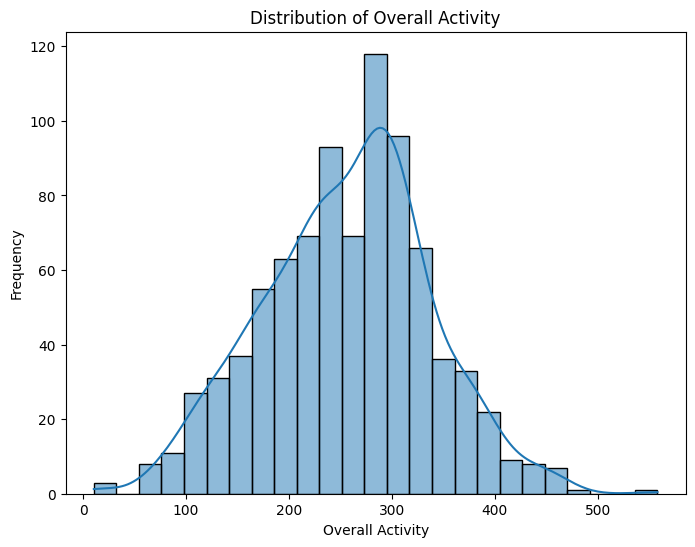

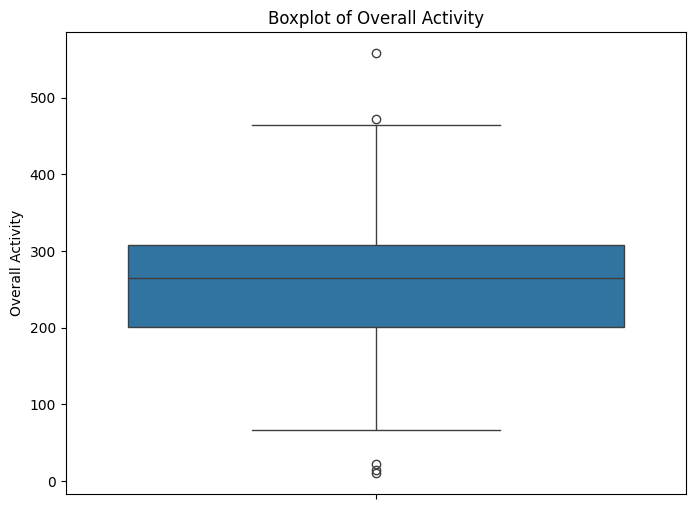

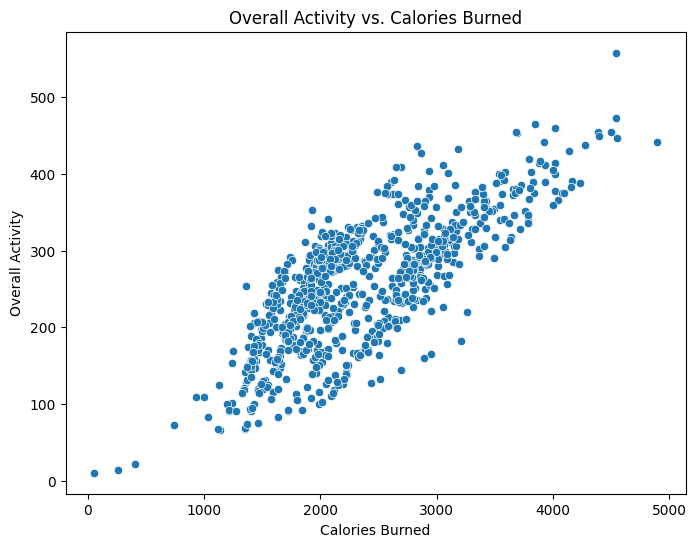

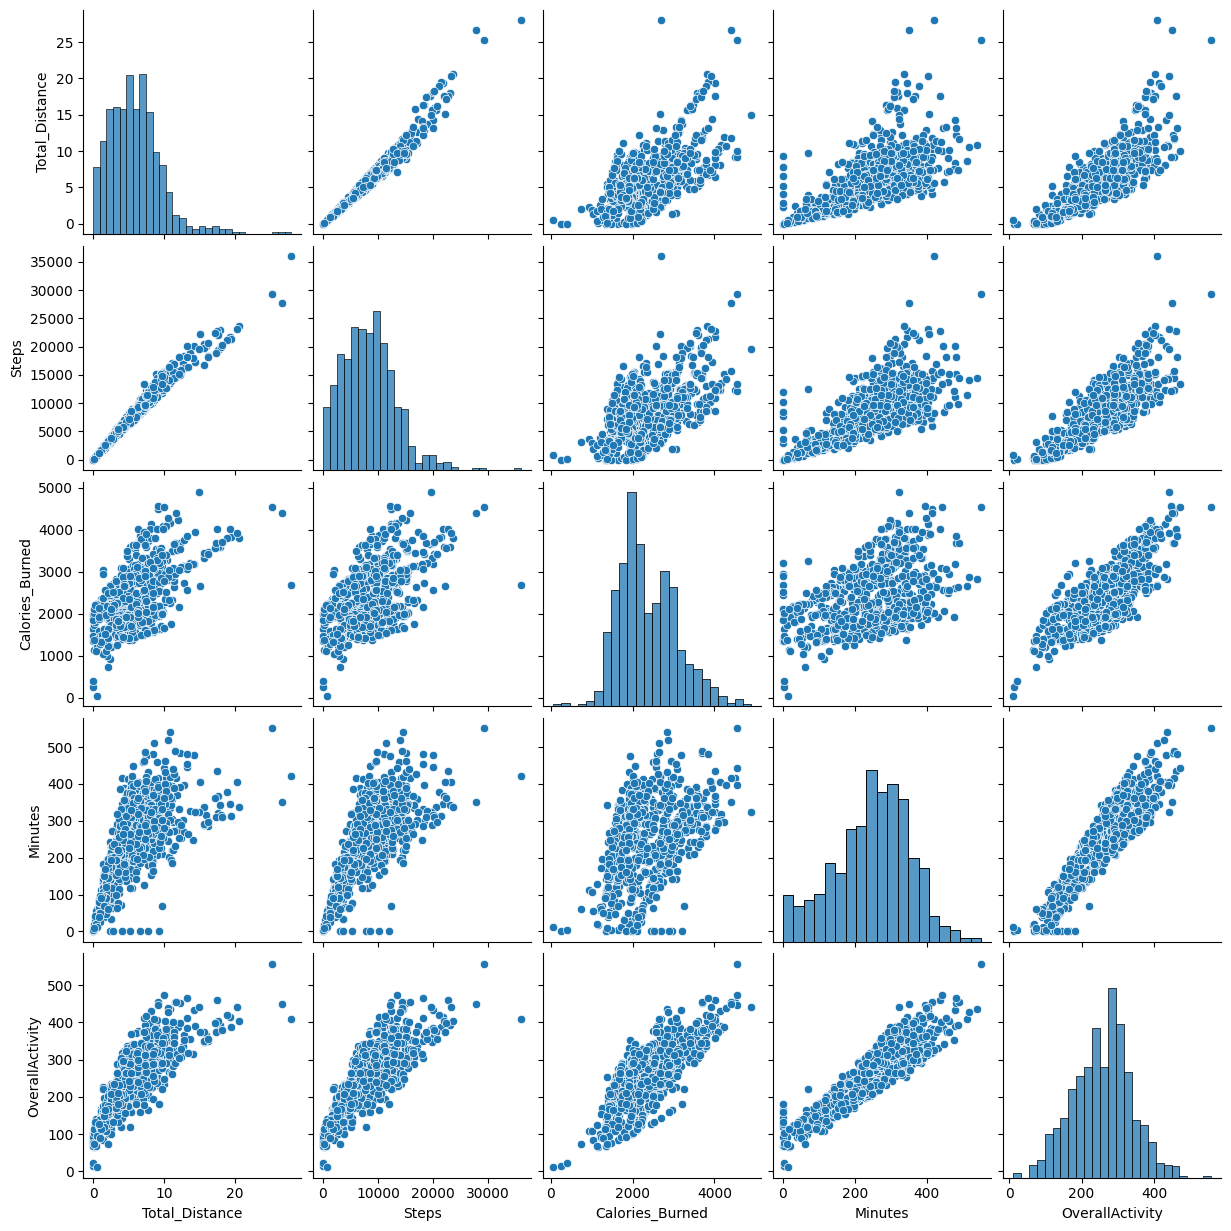

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df2['OverallActivity'], kde=True)
plt.title('Distribution of Overall Activity')
plt.xlabel('Overall Activity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['OverallActivity'])
plt.title('Boxplot of Overall Activity')
plt.ylabel('Overall Activity')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['Calories_Burned'], y=df2['OverallActivity'])
plt.title('Overall Activity vs. Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Overall Activity')
plt.show()

sns.pairplot(df2)
plt.show()

This function prompts the user for daily exercise data,
    calculates an Overall Activity Score using the following formula:

    OverallActivity = (0.001 * Steps) + (0.5 * Minutes) + (0.05 * Calories_Burned) + (1.0 * Total_Distance)

In [ ]:
def calculate_overall_activity_and_rank():

    print("Please enter your daily exercise data:")
    steps = float(input("Steps: "))
    calories = float(input("Calories burned: "))
    minutes = float(input("Minutes exercised: "))
    total_distance = float(input("Total distance (in km): "))

    # Calculate the Overall Activity Score using the provided formula
    overall_activity = (0.001 * steps) + (0.5 * minutes) + (0.05 * calories) + (1.0 * total_distance)

    print(f"\nYour Overall Activity Score is: {overall_activity:.2f}")

    if 'df2' in globals() and 'OverallActivity' in df2.columns:
        rank_percentile = (df2['OverallActivity'] < overall_activity).mean() * 100
        print(f"Your score ranks at the {rank_percentile:.1f} percentile among users today.")
    else:
        print("Ranking not available (df2 or 'OverallActivity' column not found).")

calculate_overall_activity_and_rank()


Please enter your daily exercise data:
Steps: 10000
Calories burned: 3100
Minutes exercised: 91
Total distance (in km): 12

Your Overall Activity Score is: 222.50
Your score ranks at the 32.1 percentile among users.


In [ ]:
# prompt: i want df2 by descending number for OverallActivity

df3 = df2.sort_values('OverallActivity', ascending=False)
df3

,Name,Location,Total_Distance,Steps,Calories_Burned,Minutes,OverallActivity
520,Kimberly,WA,25.290001,29326,4547,552,557.966001
586,Tiffany,ACT,9.990000,13368,4546,444,472.658000
789,Scott,VIC,13.240000,18213,3846,482,464.753000
558,Alejandro,NSW,17.540001,22770,4022,436,459.410001
250,Martha,WA,11.650000,14370,3683,490,455.170000
...,...,...,...,...,...,...,...
677,Cynthia,QLD,0.420000,590,1120,21,67.510000
176,Michelle,WA,0.160000,254,1141,17,65.964000
332,Joseph,NSW,0.030000,42,403,4,22.222000
325,Ricardo,VIC,0.010000,17,257,2,13.877000
